In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [2]:
# Load MNIST-like digits dataset from sklearn
digits = load_digits()
X, y = digits.data, digits.target

print(f"Dataset shape: X={X.shape}, y={y.shape}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Standardize features (important for SVM, Logistic Regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Dataset shape: X=(1797, 64), y=(1797,)


In [3]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVM (RBF Kernel)": SVC(kernel='rbf', gamma='scale'),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=5)
}



🔹 Training Logistic Regression...
Accuracy: 0.9722
Precision: 0.9721
Recall: 0.9719
F1 Score: 0.9719


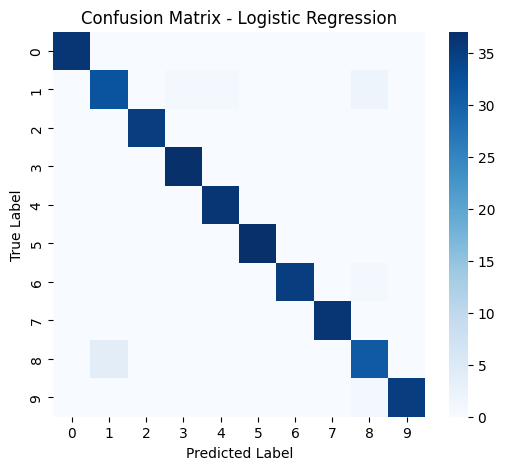


🔹 Training SVM (RBF Kernel)...
Accuracy: 0.9750
Precision: 0.9760
Recall: 0.9748
F1 Score: 0.9748


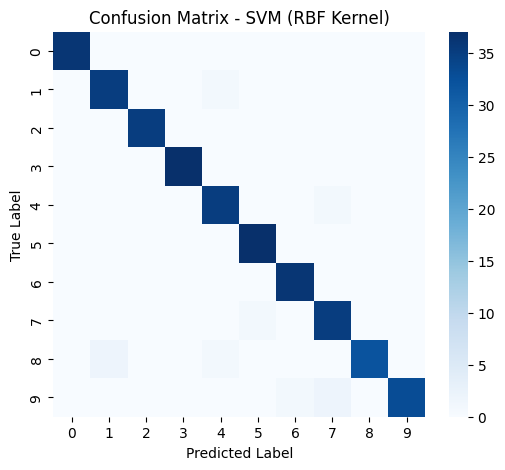


🔹 Training Random Forest...
Accuracy: 0.9639
Precision: 0.9644
Recall: 0.9635
F1 Score: 0.9634


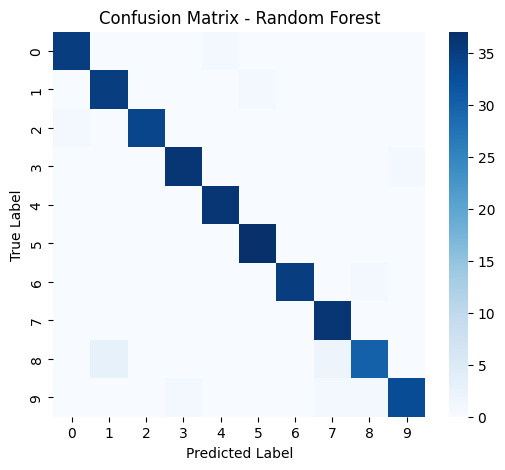


🔹 Training K-Nearest Neighbors...
Accuracy: 0.9639
Precision: 0.9646
Recall: 0.9637
F1 Score: 0.9634


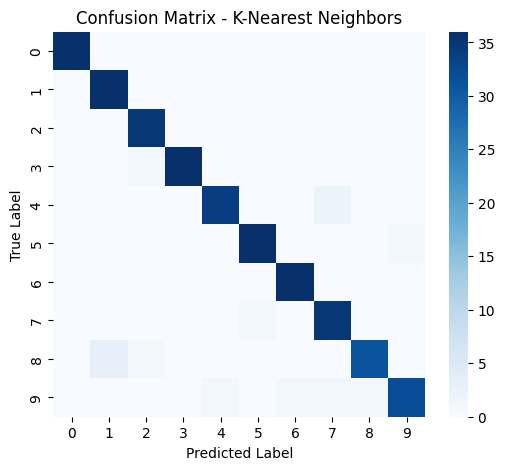

In [4]:
results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results[name] = [acc, prec, rec, f1]

    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Optional: visualize confusion matrix for each model
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=False, cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()



📈 Model Comparison:
                     Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.972222   0.972126  0.971905  0.971940
SVM (RBF Kernel)     0.975000   0.975960  0.974762  0.974847
Random Forest        0.963889   0.964407  0.963488  0.963391
K-Nearest Neighbors  0.963889   0.964590  0.963722  0.963440


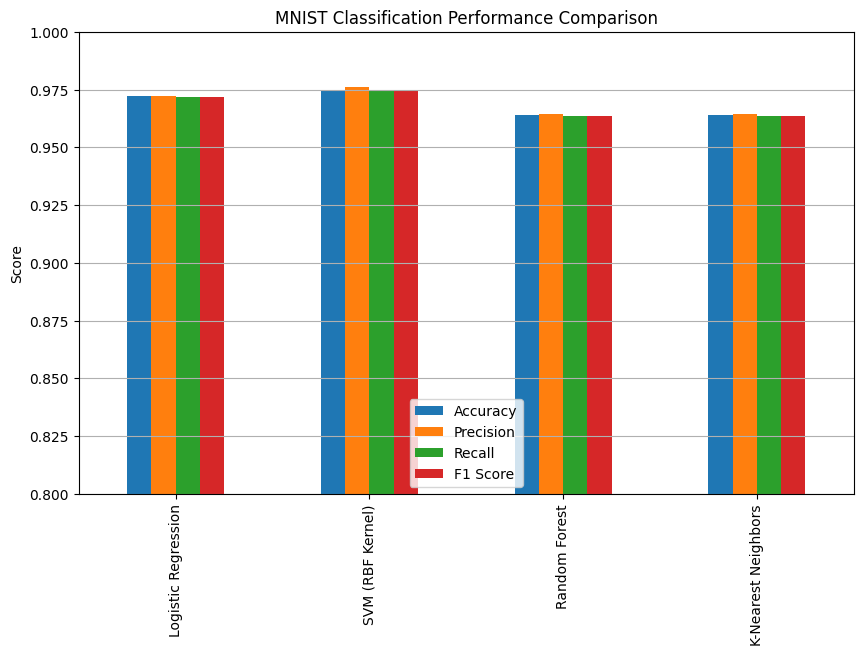

In [5]:
# Create a summary DataFrame
import pandas as pd

metrics_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "F1 Score"]).T
print("\n📈 Model Comparison:")
print(metrics_df)

# Visualize comparison
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title("MNIST Classification Performance Comparison")
plt.ylabel("Score")
plt.ylim(0.8, 1.0)
plt.grid(axis='y')
plt.show()


In [6]:
from sklearn.model_selection import StratifiedKFold

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    scores = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    print(f"{name}: Mean CV Accuracy = {scores.mean():.4f} ± {scores.std():.4f}")


Logistic Regression: Mean CV Accuracy = 0.9672 ± 0.0037
SVM (RBF Kernel): Mean CV Accuracy = 0.9878 ± 0.0042
Random Forest: Mean CV Accuracy = 0.9783 ± 0.0062
K-Nearest Neighbors: Mean CV Accuracy = 0.9872 ± 0.0080
